In [4]:
from fenics import *

%matplotlib inline

In [5]:
# Define nonlinear function
def q(u):
    return 1 + u**2

In [6]:
# Use SymPy to compute f from the manufactured solution u
import sympy as sym

x, y = sym.symbols('x[0], x[1]')
u = 1 + x + 2*y
f = - sym.diff(q(u)*sym.diff(u, x), x) - sym.diff(q(u)*sym.diff(u, y), y)
f = sym.simplify(f)
u_code = sym.printing.ccode(u)
f_code = sym.printing.ccode(f)

print('u =', u_code)
print('f =', f_code)

u = x[0] + 2*x[1] + 1
f = -10*x[0] - 20*x[1] - 10


In [8]:
# Define mesh and function space
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'P', 1)

In [9]:
# Define boundary condition
u_D = Expression(u_code, degree=1)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

In [20]:
# Solve equation
u = Function(V)
v = TestFunction(V)
f = Expression(f_code, degree=1)

F = q(u)*dot(grad(u), grad(v))*dx - f*v*dx
solve(F == 0, u, bc)

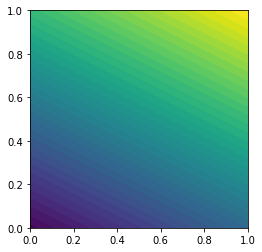

In [21]:
plot(u)

In [22]:
# Compute maximum error at vertices. This computation illustrates
# an alternative to using compute_vertex_values as in poisson.py.
import numpy as np

vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)

error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))
print(error_max)

0.0
